<a href="https://colab.research.google.com/github/pddiste/TimeSeries/blob/master/sessions_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
# For Google Colab:
!pip install kats
#!pip install kats[all]
!wget https://raw.githubusercontent.com/pddiste/TimeSeries/master/UK.csv
#!wget https://raw.githubusercontent.com/pddiste/TimeSeries/master/UK_norm.csv

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import logging
from imp import reload
from datetime import datetime, timedelta
import sys
sys.path.append("../")

from kats.consts import TimeSeriesData
reload(logging)


<module 'logging' from '/usr/lib/python3.7/logging/__init__.py'>

In [6]:
#uk = pd.read_csv("UK_norm.csv", sep=';', decimal=',')
uk = pd.read_csv("UK.csv",sep=';', decimal=',')
uk = uk.rename(columns={'date':'time'})       # ts implica 'time'
print(uk.info(verbose=True))
print(uk.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time                40 non-null     object 
 1   sessions            40 non-null     int64  
 2   searches            40 non-null     int64  
 3   bookings            40 non-null     int64  
 4   searchesONsessions  40 non-null     float64
 5   bookingsONsessions  40 non-null     float64
 6   bookingsONsearches  40 non-null     float64
dtypes: float64(3), int64(3), object(1)
memory usage: 2.3+ KB
None
      time  sessions  searches  bookings  searchesONsessions  \
0  2019-01   7454104  11404088     75373            1.529907   
1  2019-02   6791849   8546751     67871            1.258384   
2  2019-03   7151561   9545732     80871            1.334776   
3  2019-04   7111621   9653586     74426            1.357438   
4  2019-05   7799312  11082118     81373            1.420910   

   bo

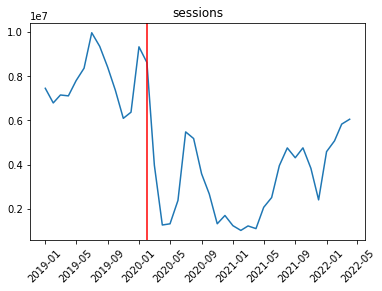

# cp = 1
CUSUMChangePoint(start_time: 2020-02-01 00:00:00, end_time: 2020-02-01 00:00:00, confidence: 0.9999999999305712, direction: decrease, index: 13, delta: -4654069.851648351, regression_detected: True, stable_changepoint: True, mu0: 7870488.928571428, mu1: 3216419.076923077, llr: 46.781439210496615, llr_int: inf, p_value: 6.942879604565633e-11, p_value_int: nan)
cp_time = 2020-02-01 00:00:00  <-->  2020-02-01 00:00:00

confidence = 0.9999999999305712
direction = decrease
cp_index = 13
mu0 = 7870488.928571428
mu1 = 3216419.076923077
delta = -4654069.851648351
llr_int = inf
llr = 46.781439210496615
regression_detected = True
stable_changepoint = True
p_value = 6.942879604565633e-11
p_value_int = nan


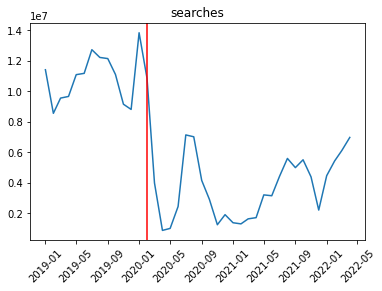

# cp = 1
CUSUMChangePoint(start_time: 2020-02-01 00:00:00, end_time: 2020-02-01 00:00:00, confidence: 0.9999999999999297, direction: decrease, index: 13, delta: -7216182.236263737, regression_detected: True, stable_changepoint: True, mu0: 10869213.92857143, mu1: 3653031.6923076925, llr: 60.57133142276169, llr_int: inf, p_value: 7.027711745877241e-14, p_value_int: nan)
cp_time = 2020-02-01 00:00:00  <-->  2020-02-01 00:00:00

confidence = 0.9999999999999297
direction = decrease
cp_index = 13
mu0 = 10869213.92857143
mu1 = 3653031.6923076925
delta = -7216182.236263737
llr_int = inf
llr = 60.57133142276169
regression_detected = True
stable_changepoint = True
p_value = 7.027711745877241e-14
p_value_int = nan


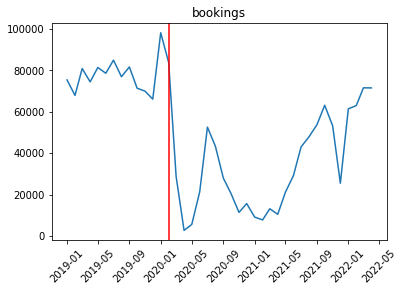

# cp = 1
CUSUMChangePoint(start_time: 2020-02-01 00:00:00, end_time: 2020-02-01 00:00:00, confidence: 0.9999999618883024, direction: decrease, index: 13, delta: -44328.846153846156, regression_detected: True, stable_changepoint: True, mu0: 77947.5, mu1: 33618.653846153844, llr: 34.165489156853866, llr_int: inf, p_value: 3.811169757561572e-08, p_value_int: nan)
cp_time = 2020-02-01 00:00:00  <-->  2020-02-01 00:00:00

confidence = 0.9999999618883024
direction = decrease
cp_index = 13
mu0 = 77947.5
mu1 = 33618.653846153844
delta = -44328.846153846156
llr_int = inf
llr = 34.165489156853866
regression_detected = True
stable_changepoint = True
p_value = 3.811169757561572e-08
p_value_int = nan


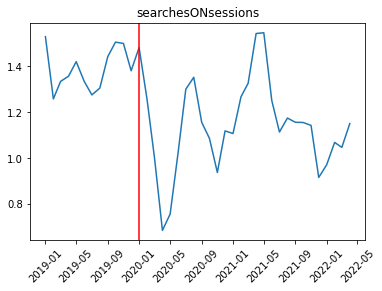

# cp = 1
CUSUMChangePoint(start_time: 2020-01-01 00:00:00, end_time: 2020-01-01 00:00:00, confidence: 0.9998167358343659, direction: decrease, index: 12, delta: -0.2606488461538461, regression_detected: True, stable_changepoint: True, mu0: 1.394701846153846, mu1: 1.134053, llr: 17.20916383590524, llr_int: inf, p_value: 0.00018326416563407832, p_value_int: nan)
cp_time = 2020-01-01 00:00:00  <-->  2020-01-01 00:00:00

confidence = 0.9998167358343659
direction = decrease
cp_index = 12
mu0 = 1.394701846153846
mu1 = 1.134053
delta = -0.2606488461538461
llr_int = inf
llr = 17.20916383590524
regression_detected = True
stable_changepoint = True
p_value = 0.00018326416563407832
p_value_int = nan


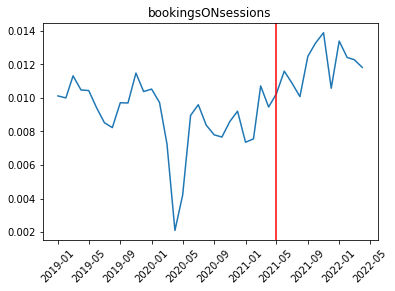

# cp = 1
CUSUMChangePoint(start_time: 2021-05-01 00:00:00, end_time: 2021-05-01 00:00:00, confidence: 0.9999301166986927, direction: increase, index: 28, delta: 0.003124727272727272, regression_detected: True, stable_changepoint: True, mu0: 0.008927999999999998, mu1: 0.01205272727272727, llr: 19.137367662588662, llr_int: inf, p_value: 6.988330130730525e-05, p_value_int: nan)
cp_time = 2021-05-01 00:00:00  <-->  2021-05-01 00:00:00

confidence = 0.9999301166986927
direction = increase
cp_index = 28
mu0 = 0.008927999999999998
mu1 = 0.01205272727272727
delta = 0.003124727272727272
llr_int = inf
llr = 19.137367662588662
regression_detected = True
stable_changepoint = True
p_value = 6.988330130730525e-05
p_value_int = nan


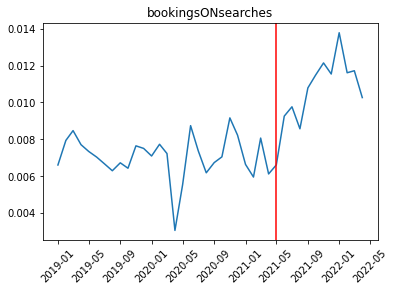

# cp = 1
CUSUMChangePoint(start_time: 2021-05-01 00:00:00, end_time: 2021-05-01 00:00:00, confidence: 0.9999999998795637, direction: increase, index: 28, delta: 0.00395753605015674, regression_detected: True, stable_changepoint: True, mu0: 0.007032827586206897, mu1: 0.010990363636363637, llr: 45.67980027830794, llr_int: inf, p_value: 1.204363275775222e-10, p_value_int: nan)
cp_time = 2021-05-01 00:00:00  <-->  2021-05-01 00:00:00

confidence = 0.9999999998795637
direction = increase
cp_index = 28
mu0 = 0.007032827586206897
mu1 = 0.010990363636363637
delta = 0.00395753605015674
llr_int = inf
llr = 45.67980027830794
regression_detected = True
stable_changepoint = True
p_value = 1.204363275775222e-10
p_value_int = nan


In [7]:
# import packages
from kats.detectors.cusum_detection import CUSUMDetector


tsd = TimeSeriesData(uk.loc[:,['time','sessions']])

detector = CUSUMDetector(tsd)
change_points = detector.detector()
#change_points = detector.detector(change_directions=["decrease"])
#change_points = detector.detector(change_directions=["increase"])

detector.plot(change_points)
plt.xticks(rotation=45)
plt.title('sessions')
plt.show()

print('# cp =', len(change_points))

change_point= change_points[0]
print(change_point)

print('cp_time','=', change_point.start_time, " <--> ",change_point.end_time) 
print('') 
print('confidence','=', change_point.confidence) 
print('direction','=', change_point.direction) 
print('cp_index','=', change_point.cp_index) 
print('mu0','=', change_point.mu0) 
print('mu1','=', change_point.mu1) 
print('delta','=', change_point.delta) 
print('llr_int','=', change_point.llr_int) 
print('llr','=',change_point.llr) 
print('regression_detected','=',change_point.regression_detected) 
print('stable_changepoint','=',change_point.stable_changepoint) 
print('p_value','=',change_point.p_value) 
print('p_value_int','=',change_point.p_value_int) 

#----

tsd = TimeSeriesData(uk.loc[:,['time','searches']])

detector = CUSUMDetector(tsd)
change_points = detector.detector()
#change_points = detector.detector(change_directions=["decrease"])
#change_points = detector.detector(change_directions=["increase"])

detector.plot(change_points)
plt.xticks(rotation=45)
plt.title('searches')
plt.show()

print('# cp =', len(change_points))

change_point= change_points[0]
print(change_point)

print('cp_time','=', change_point.start_time, " <--> ",change_point.end_time) 
print('') 
print('confidence','=', change_point.confidence) 
print('direction','=', change_point.direction) 
print('cp_index','=', change_point.cp_index) 
print('mu0','=', change_point.mu0) 
print('mu1','=', change_point.mu1) 
print('delta','=', change_point.delta) 
print('llr_int','=', change_point.llr_int) 
print('llr','=',change_point.llr) 
print('regression_detected','=',change_point.regression_detected) 
print('stable_changepoint','=',change_point.stable_changepoint) 
print('p_value','=',change_point.p_value) 
print('p_value_int','=',change_point.p_value_int) 

#----

tsd = TimeSeriesData(uk.loc[:,['time','bookings']])

detector = CUSUMDetector(tsd)
change_points = detector.detector()
#change_points = detector.detector(change_directions=["decrease"])
#change_points = detector.detector(change_directions=["increase"])

detector.plot(change_points)
plt.xticks(rotation=45)
plt.title('bookings')
plt.show()

print('# cp =', len(change_points))

change_point= change_points[0]
print(change_point)

print('cp_time','=', change_point.start_time, " <--> ",change_point.end_time) 
print('') 
print('confidence','=', change_point.confidence) 
print('direction','=', change_point.direction) 
print('cp_index','=', change_point.cp_index) 
print('mu0','=', change_point.mu0) 
print('mu1','=', change_point.mu1) 
print('delta','=', change_point.delta) 
print('llr_int','=', change_point.llr_int) 
print('llr','=',change_point.llr) 
print('regression_detected','=',change_point.regression_detected) 
print('stable_changepoint','=',change_point.stable_changepoint) 
print('p_value','=',change_point.p_value) 
print('p_value_int','=',change_point.p_value_int) 

#----

tsd = TimeSeriesData(uk.loc[:,['time','searchesONsessions']])

detector = CUSUMDetector(tsd)
change_points = detector.detector()
#change_points = detector.detector(change_directions=["decrease"])
#change_points = detector.detector(change_directions=["increase"])

detector.plot(change_points)
plt.xticks(rotation=45)
plt.title('searchesONsessions')
plt.show()

print('# cp =', len(change_points))

change_point= change_points[0]
print(change_point)

print('cp_time','=', change_point.start_time, " <--> ",change_point.end_time) 
print('') 
print('confidence','=', change_point.confidence) 
print('direction','=', change_point.direction) 
print('cp_index','=', change_point.cp_index) 
print('mu0','=', change_point.mu0) 
print('mu1','=', change_point.mu1) 
print('delta','=', change_point.delta) 
print('llr_int','=', change_point.llr_int) 
print('llr','=',change_point.llr) 
print('regression_detected','=',change_point.regression_detected) 
print('stable_changepoint','=',change_point.stable_changepoint) 
print('p_value','=',change_point.p_value) 
print('p_value_int','=',change_point.p_value_int) 

#---------

tsd = TimeSeriesData(uk.loc[:,['time','bookingsONsessions']])

detector = CUSUMDetector(tsd)
change_points = detector.detector()
#change_points = detector.detector(change_directions=["decrease"])
#change_points = detector.detector(change_directions=["increase"])

detector.plot(change_points)
plt.xticks(rotation=45)
plt.title('bookingsONsessions')
plt.show()

print('# cp =', len(change_points))

change_point= change_points[0]
print(change_point)

print('cp_time','=', change_point.start_time, " <--> ",change_point.end_time) 
print('') 
print('confidence','=', change_point.confidence) 
print('direction','=', change_point.direction) 
print('cp_index','=', change_point.cp_index) 
print('mu0','=', change_point.mu0) 
print('mu1','=', change_point.mu1) 
print('delta','=', change_point.delta) 
print('llr_int','=', change_point.llr_int) 
print('llr','=',change_point.llr) 
print('regression_detected','=',change_point.regression_detected) 
print('stable_changepoint','=',change_point.stable_changepoint) 
print('p_value','=',change_point.p_value) 
print('p_value_int','=',change_point.p_value_int) 

#---------

tsd = TimeSeriesData(uk.loc[:,['time','bookingsONsearches']])

detector = CUSUMDetector(tsd)
change_points = detector.detector()
#change_points = detector.detector(change_directions=["decrease"])
#change_points = detector.detector(change_directions=["increase"])

detector.plot(change_points)
plt.xticks(rotation=45)
plt.title('bookingsONsearches')
plt.show()

print('# cp =', len(change_points))

change_point= change_points[0]
print(change_point)

print('cp_time','=', change_point.start_time, " <--> ",change_point.end_time) 
print('') 
print('confidence','=', change_point.confidence) 
print('direction','=', change_point.direction) 
print('cp_index','=', change_point.cp_index) 
print('mu0','=', change_point.mu0) 
print('mu1','=', change_point.mu1) 
print('delta','=', change_point.delta) 
print('llr_int','=', change_point.llr_int) 
print('llr','=',change_point.llr) 
print('regression_detected','=',change_point.regression_detected) 
print('stable_changepoint','=',change_point.stable_changepoint) 
print('p_value','=',change_point.p_value) 
print('p_value_int','=',change_point.p_value_int) 


In [ ]:
print('# cp =', len(change_points))

change_point= change_points[0]
print(change_point)

print('cp_time','=', change_point.start_time, " <--> ",change_point.end_time) 
print('') 
print('confidence','=', change_point.confidence) 
print('direction','=', change_point.direction) 
print('cp_index','=', change_point.cp_index) 
print('mu0','=', change_point.mu0) 
print('mu1','=', change_point.mu1) 
print('delta','=', change_point.delta) 
print('llr_int','=', change_point.llr_int) 
print('llr','=',change_point.llr) 
print('regression_detected','=',change_point.regression_detected) 
print('stable_changepoint','=',change_point.stable_changepoint) 
print('p_value','=',change_point.p_value) 
print('p_value_int','=',change_point.p_value_int) 

# cp = 1
CUSUMChangePoint(start_time: 2021-05-01 00:00:00, end_time: 2021-05-01 00:00:00, confidence: 0.9999302075018536, direction: increase, index: 28, delta: 1.3651478369905956, regression_detected: True, stable_changepoint: True, mu0: -0.37541565517241376, mu1: 0.9897321818181818, llr: 19.139968060768055, llr_int: inf, p_value: 6.979249814642596e-05, p_value_int: nan)
cp_time = 2021-05-01 00:00:00  <-->  2021-05-01 00:00:00

confidence = 0.9999302075018536
direction = increase
cp_index = 28
mu0 = -0.37541565517241376
mu1 = 0.9897321818181818
delta = 1.3651478369905956
llr_int = inf
llr = 19.139968060768055
regression_detected = True
stable_changepoint = True
p_value = 6.979249814642596e-05
p_value_int = nan


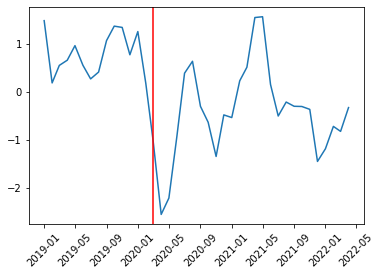

In [ ]:
# import package
from kats.detectors.robust_stat_detection import RobustStatDetector

tsd = TimeSeriesData(uk.loc[:,['time','searchesONsessions']])
detector = RobustStatDetector(tsd)
change_points = detector.detector()

detector.plot(change_points)
plt.xticks(rotation=45)
plt.show()

In [ ]:
change_point = change_points[0]
change_point

TimeSeriesChangePoint(start_time: 2020-03-01T00:00:00.000000000, end_time: 2020-03-01T00:00:00.000000000, confidence: 0.9945009585875861)

In [ ]:
print('metric','=',change_point.metric)
print('index','=',change_point.index)
uk['time'].iloc[change_point.index]

metric = 1.3791174
index = 14


'2020-03'

In [ ]:
from kats.utils.simulator import Simulator
from kats.tsfeatures.tsfeatures import TsFeatures
model = TsFeatures()
output_features = model.transform(tsd)
output_features

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1911: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




{'binarize_mean': 0.525,
 'crossing_points': 5,
 'diff1y_acf1': 0.2373240152527007,
 'diff1y_acf5': 0.3184014456357367,
 'diff1y_pacf5': 0.3016705267236452,
 'diff2y_acf1': -0.2071909537122352,
 'diff2y_acf5': 0.17133249094998743,
 'diff2y_pacf5': 0.332058696374674,
 'entropy': 0.6574841904522312,
 'firstmin_ac': 5,
 'firstzero_ac': 4,
 'flat_spots': 1,
 'heterogeneity': 13.316831646996473,
 'histogram_mode': -0.4921034999999998,
 'holt_alpha': 0.9999999850983337,
 'holt_beta': 2.700432882642013e-12,
 'hurst': -0.1783203186404476,
 'hw_alpha': nan,
 'hw_beta': nan,
 'hw_gamma': nan,
 'length': 40,
 'level_shift_idx': 2,
 'level_shift_size': 0.09506280000000006,
 'linearity': 0.17355561701774808,
 'lumpiness': 0.09360866813429107,
 'mean': 2.500000007010783e-08,
 'peak': 4,
 'seas_acf1': -0.007615054074994546,
 'seas_pacf1': 0.02199529084645631,
 'seasonality_strength': 0.45935831953539863,
 'spikiness': 0.00010544914779408261,
 'stability': 0.3609204941282864,
 'std1st_der': 0.58666322

In [ ]:


# import the param and model classes for Prophet model
from kats.models.prophet import ProphetModel, ProphetParams

# create a model param instance
params = ProphetParams( seasonality_mode='additive') # additive mode gives worse results - multiplicative

# create a prophet model instance
m = ProphetModel(tsd, params)

# fit model simply by calling m.fit()
m.fit()

# make prediction for next 30 month
fcst = m.predict(steps=2)   # , freq="MS"



# the predict method returns a dataframe as follows
print(fcst.head())



        time      fcst  fcst_lower  fcst_upper
0 2022-05-01 -0.488149   -1.496528    0.508322
1 2022-06-01 -0.903455   -1.895129    0.146901


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:671: FutureWarning:

fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning:

After 0.13 initialization must be handled at model creation

/usr/local/lib/python3.7/dist-packages/kats/models/theta.py:130: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



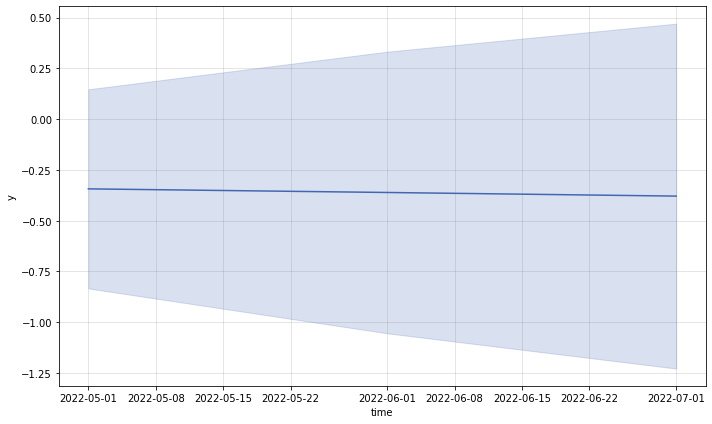

In [ ]:
# import param and model from `kats.models.theta`
from kats.models.theta import ThetaModel, ThetaParams

# create ThetaParam with specifying seasonality param value
params = ThetaParams(m=12)

# create ThetaModel with given data and parameter class
m = ThetaModel(data=tsd, params=params)

# call fit method to fit model
m.fit()

# call predict method to predict the next 30 steps
res = m.predict(steps=3, alpha=0.5)

# visualize the results
m.plot()



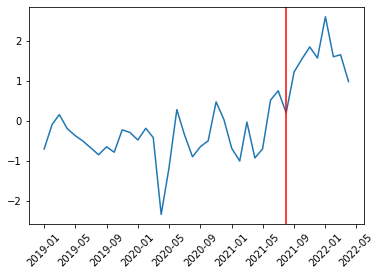

In [ ]:


# import package
from kats.detectors.robust_stat_detection import RobustStatDetector

tsd = TimeSeriesData(uk.loc[:,['time','bookingsONsearches']])

detector = RobustStatDetector(tsd)
change_points = detector.detector()

detector.plot(change_points)
plt.xticks(rotation=45)
plt.show()

